# Aula 5 - Explorando variáveis

**Situação Real:**

Você é um analista de dados trabalhando para uma grande rede de varejo.

No início do novo ano, seu chefe pede que você analise os dados de vendas do ano passado para entender o desempenho da empresa.

Ele quer identificar quais categorias de produtos tiveram melhor desempenho, quais estratégias funcionaram melhor e onde há oportunidades de melhoria.

**Desafio:**

Seu objetivo é explorar a base de dados de vendas do ano passado e preparar um relatório visual para apresentar seus achados ao seu chefe.

O relatório deve incluir insights claros e acionáveis que possam ajudar a empresa a tomar decisões informadas para o ano corrente.

**Tarefas:**

1. Análise por Categoria de Produto:

    - Quais categorias de produtos tiveram o maior volume de vendas?
    - Houve alguma categoria que se destacou em relação ao total vendido?

2. Distribuição de Vendas:

    - Como foi a distribuição das vendas ao longo do ano?
    - Houve picos de vendas em determinados períodos?

3. Relação Entre Variáveis:

    - Existe alguma relação entre o preço dos produtos e a quantidade vendida?
    - Como a quantidade vendida varia entre diferentes categorias de produtos?

4. Evolução das Vendas:

    - Como as vendas evoluíram ao longo do ano?
    - Houve crescimento ou declínio significativo em certos meses?

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
df_vendas = pd.read_csv('/content/drive/MyDrive/dados/vendas_tech.csv')

In [23]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   produto_id      10000 non-null  object
 1   nome_produto    10000 non-null  object
 2   categoria       10000 non-null  object
 3   data_venda      10000 non-null  object
 4   quantidade      10000 non-null  int64 
 5   preco_unitario  10000 non-null  int64 
 6   total_venda     10000 non-null  int64 
 7   Venda           10000 non-null  object
dtypes: int64(3), object(5)
memory usage: 625.1+ KB


In [24]:
df_vendas.head()

,produto_id,nome_produto,categoria,data_venda,quantidade,preco_unitario,total_venda,Venda
0,P005,Carregador,Acessórios,2023-01-01,4,100,400,2023-00001
1,P001,Smartphone,Eletrônicos,2023-01-01,2,2000,4000,2023-00002
2,P005,Carregador,Acessórios,2023-01-01,3,100,300,2023-00003
3,P001,Smartphone,Eletrônicos,2023-01-01,5,2000,10000,2023-00004
4,P005,Carregador,Acessórios,2023-01-01,4,100,400,2023-00005


In [25]:
df_vendas.shape

(10000, 8)

## 1. Análise por Categoria de Produto:

**Quais categorias de produtos tiveram o maior volume de vendas?**

In [26]:
df_vendas['categoria'].unique()

array(['Acessórios', 'Eletrônicos'], dtype=object)

In [27]:
df_vendas['categoria'].value_counts().reset_index()

,categoria,count
0,Eletrônicos,5988
1,Acessórios,4012


In [28]:
#Agrupamento dos dados por categoria e contando a quantidade de vendas
vendas_por_categoria = df_vendas.groupby('categoria')['Venda'].count().reset_index().sort_values(by='Venda', ascending=False)

In [29]:
vendas_por_categoria

,categoria,Venda
1,Eletrônicos,5988
0,Acessórios,4012


**Gráficos:** Pizza, coluna, barra.

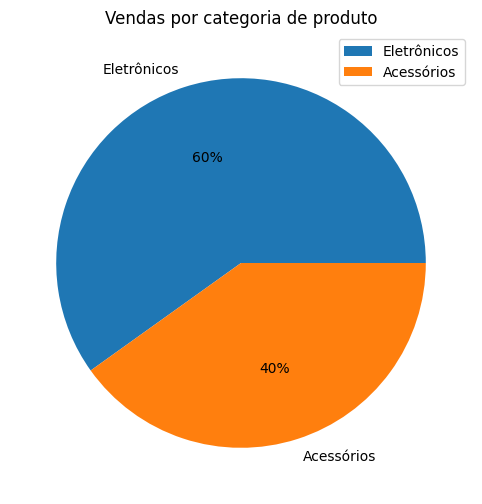

In [30]:
plt.figure(figsize=(8,6))
plt.pie(vendas_por_categoria['Venda'],
        labels = vendas_por_categoria['categoria'],
        autopct='%.0f%%')
plt.title('Vendas por categoria de produto')
plt.legend()
plt.show()

/tmp/ipython-input-3220160084.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


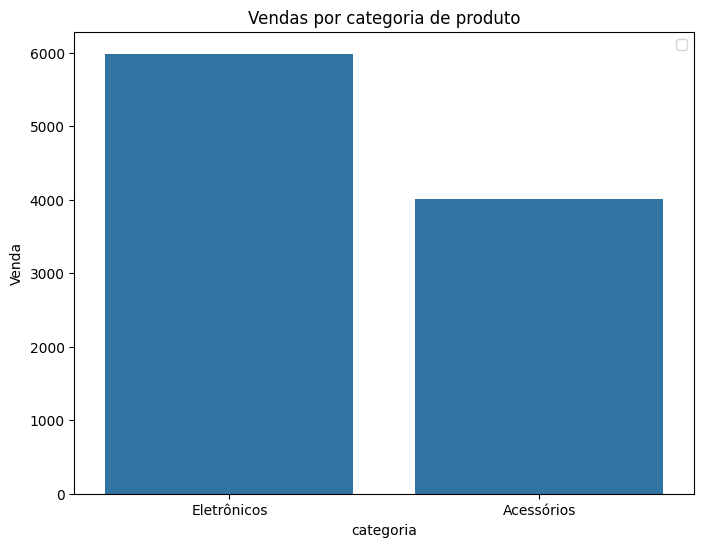

In [31]:
plt.figure(figsize=(8,6))
sns.barplot(data=vendas_por_categoria, x = 'categoria', y = 'Venda')
plt.title('Vendas por categoria de produto')
plt.legend()
plt.show()

E se eu quiser na horizontal?

/tmp/ipython-input-1686764267.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


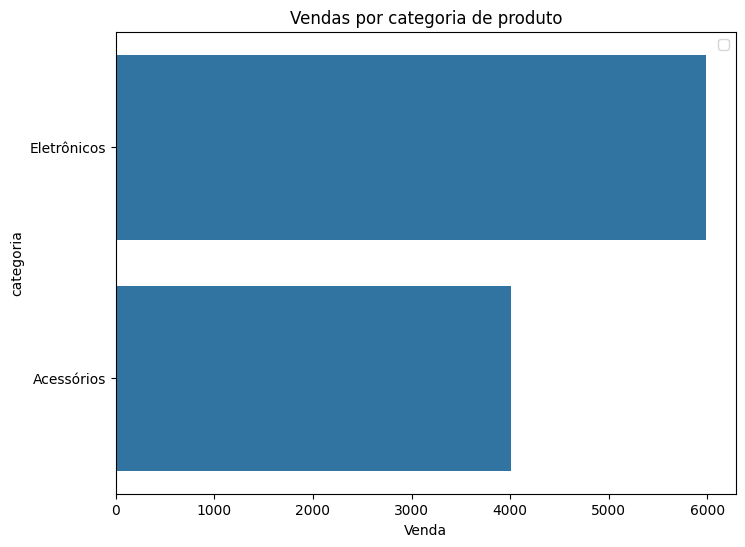

In [32]:
plt.figure(figsize=(8,6))
sns.barplot(data=vendas_por_categoria, y = 'categoria', x = 'Venda')
plt.title('Vendas por categoria de produto')
plt.legend()
plt.show()

Gráfico de pizza, pode?
- Até 4 segmentações, faz sentido.
- Mais que 4? Pula fora.

**Houve alguma categoria que se destacou em relação ao total vendido?**

In [33]:
#Agrupamento dos dados por categoria e somando o total das vendas
total_vendido_por_categoria = df_vendas.groupby('categoria')['total_venda'].sum().reset_index().sort_values(by='total_venda', ascending=False)

In [34]:
total_vendido_por_categoria

,categoria,total_venda
1,Eletrônicos,40885000
0,Acessórios,914800


/tmp/ipython-input-2251411165.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


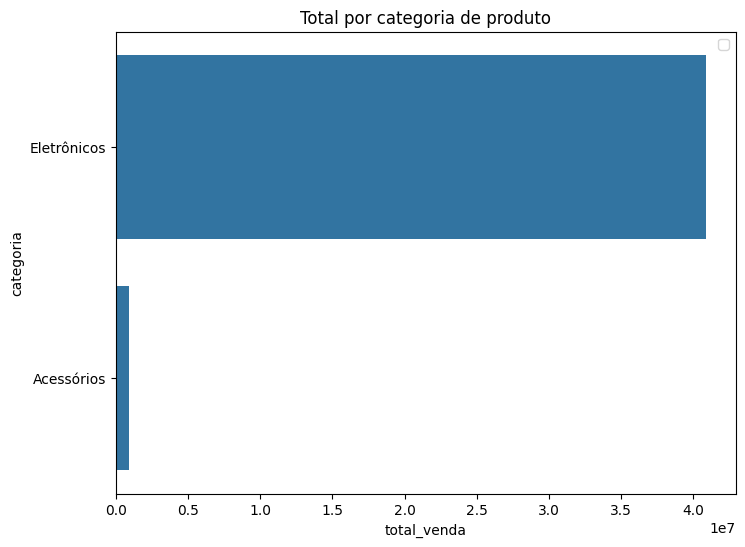

In [35]:
plt.figure(figsize=(8,6))
sns.barplot(data=total_vendido_por_categoria, y = 'categoria', x = 'total_venda')
plt.title('Total por categoria de produto')
plt.legend()
plt.show()

## 2. Distribuição de Vendas:

**Como foi a distribuição das vendas ao longo do ano?**

In [36]:
df_vendas.head()

,produto_id,nome_produto,categoria,data_venda,quantidade,preco_unitario,total_venda,Venda
0,P005,Carregador,Acessórios,2023-01-01,4,100,400,2023-00001
1,P001,Smartphone,Eletrônicos,2023-01-01,2,2000,4000,2023-00002
2,P005,Carregador,Acessórios,2023-01-01,3,100,300,2023-00003
3,P001,Smartphone,Eletrônicos,2023-01-01,5,2000,10000,2023-00004
4,P005,Carregador,Acessórios,2023-01-01,4,100,400,2023-00005


In [37]:
df_vendas['data_venda'] = pd.to_datetime(df_vendas['data_venda'])

In [38]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   produto_id      10000 non-null  object        
 1   nome_produto    10000 non-null  object        
 2   categoria       10000 non-null  object        
 3   data_venda      10000 non-null  datetime64[ns]
 4   quantidade      10000 non-null  int64         
 5   preco_unitario  10000 non-null  int64         
 6   total_venda     10000 non-null  int64         
 7   Venda           10000 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 625.1+ KB


In [39]:
df_vendas['Mês'] = df_vendas['data_venda'].dt.month_name()

In [40]:
df_vendas['Mês_num'] = df_vendas['data_venda'].dt.month

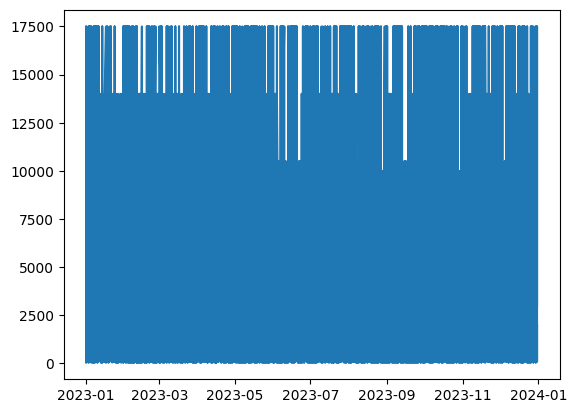

In [41]:
plt.plot(df_vendas['data_venda'],df_vendas['total_venda'])
plt.show()

In [42]:
df_vendas_por_dia = df_vendas.groupby('data_venda')['Venda'].count().reset_index()

In [43]:
df_vendas_por_dia

,data_venda,Venda
0,2023-01-01,31
1,2023-01-02,24
2,2023-01-03,25
3,2023-01-04,32
4,2023-01-05,29
...,...,...
360,2023-12-27,27
361,2023-12-28,26
362,2023-12-29,26
363,2023-12-30,33


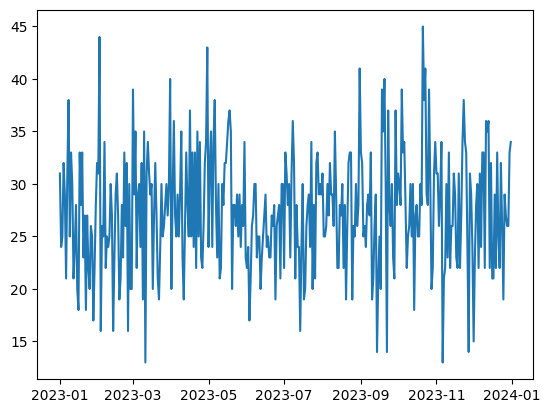

In [44]:
plt.plot(df_vendas_por_dia['data_venda'],df_vendas_por_dia['Venda'])
plt.show()

In [45]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   produto_id      10000 non-null  object        
 1   nome_produto    10000 non-null  object        
 2   categoria       10000 non-null  object        
 3   data_venda      10000 non-null  datetime64[ns]
 4   quantidade      10000 non-null  int64         
 5   preco_unitario  10000 non-null  int64         
 6   total_venda     10000 non-null  int64         
 7   Venda           10000 non-null  object        
 8   Mês             10000 non-null  object        
 9   Mês_num         10000 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(3), object(5)
memory usage: 742.3+ KB


In [46]:
df_vendas_por_mes = df_vendas.groupby(['Mês','Mês_num'])['Venda'].count().reset_index().sort_values(by='Mês_num')

In [47]:
df_vendas_por_mes

,Mês,Mês_num,Venda
4,January,1,811
3,February,2,723
7,March,3,868
0,April,4,857
8,May,5,895
6,June,6,751
5,July,7,835
1,August,8,861
11,September,9,820
10,October,10,919


Houve picos de vendas em determinados períodos?

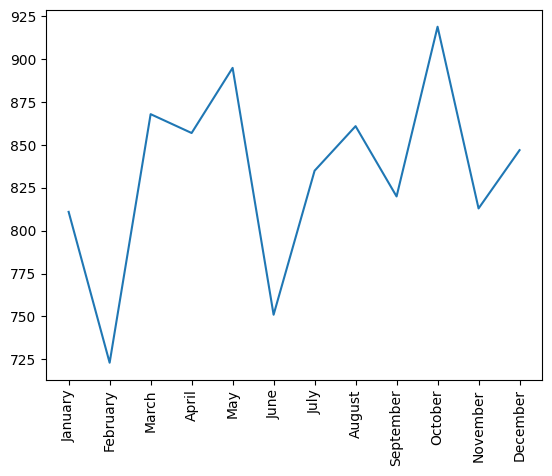

In [48]:
plt.plot(df_vendas_por_mes['Mês'],df_vendas_por_mes['Venda'])
plt.xticks(rotation=90)
plt.show()

## 3. Relação Entre Variáveis:

**Existe alguma relação entre o preço dos produtos e a quantidade vendida?**

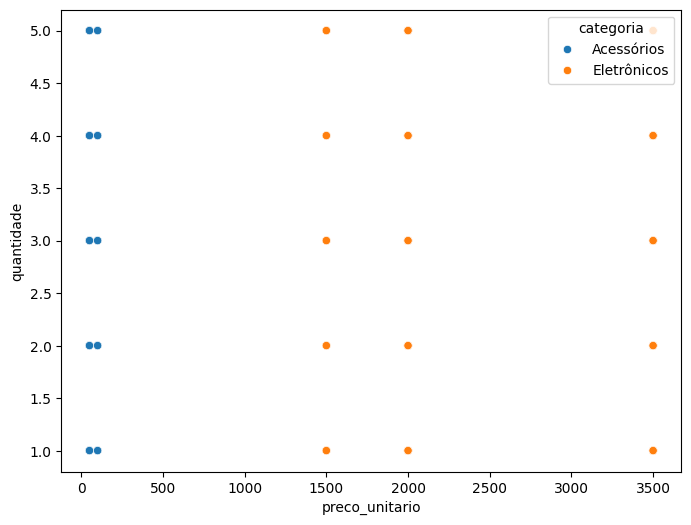

In [49]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_vendas, x = 'preco_unitario', y = 'quantidade',hue='categoria')
plt.show()

In [50]:
df_vendas

,produto_id,nome_produto,categoria,data_venda,quantidade,preco_unitario,total_venda,Venda,Mês,Mês_num
0,P005,Carregador,Acessórios,2023-01-01,4,100,400,2023-00001,January,1
1,P001,Smartphone,Eletrônicos,2023-01-01,2,2000,4000,2023-00002,January,1
2,P005,Carregador,Acessórios,2023-01-01,3,100,300,2023-00003,January,1
3,P001,Smartphone,Eletrônicos,2023-01-01,5,2000,10000,2023-00004,January,1
4,P005,Carregador,Acessórios,2023-01-01,4,100,400,2023-00005,January,1
...,...,...,...,...,...,...,...,...,...,...
9995,P001,Smartphone,Eletrônicos,2023-12-31,1,2000,2000,2023-09996,December,12
9996,P001,Smartphone,Eletrônicos,2023-12-31,2,2000,4000,2023-09997,December,12
9997,P002,Laptop,Eletrônicos,2023-12-31,2,3500,7000,2023-09998,December,12
9998,P002,Laptop,Eletrônicos,2023-12-31,3,3500,10500,2023-09999,December,12


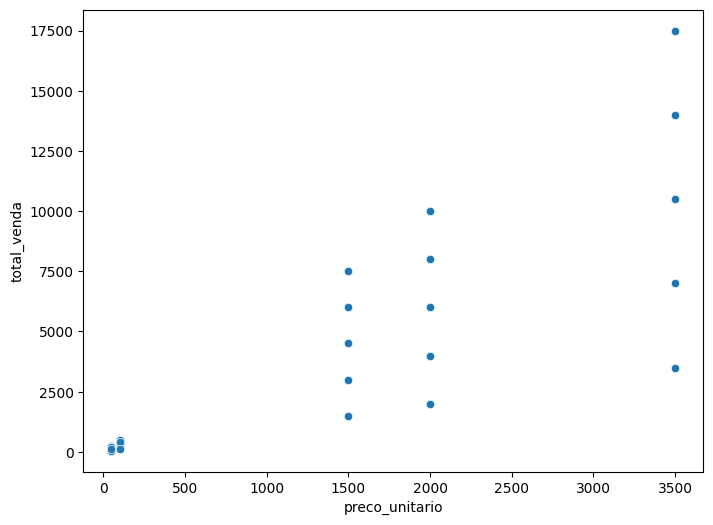

In [51]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_vendas, x = 'preco_unitario', y = 'total_venda')
plt.show()

In [52]:
df_vendas.select_dtypes('number').corr()

,quantidade,preco_unitario,total_venda,Mês_num
quantidade,1.000000,-0.028976,0.407261,0.007168
preco_unitario,-0.028976,1.000000,0.813371,-0.012856
total_venda,0.407261,0.813371,1.000000,-0.006280
Mês_num,0.007168,-0.012856,-0.006280,1.000000


In [53]:
df_vendas['preco_unitario'].describe()

,preco_unitario
count,10000.000000
mean,1418.020000
std,1277.384809
min,50.000000
25%,100.000000
50%,1500.000000
75%,2000.000000
max,3500.000000


In [54]:
tipo_produto = []
for valor in df_vendas['preco_unitario']:
  if valor < df_vendas['preco_unitario'].quantile(.25):
    tipo_produto.append('barato')
  elif valor < df_vendas['preco_unitario'].quantile(.5):
    tipo_produto.append('medio')
  else:
    tipo_produto.append('caro')

In [55]:
df_vendas['tipo_produto'] = tipo_produto

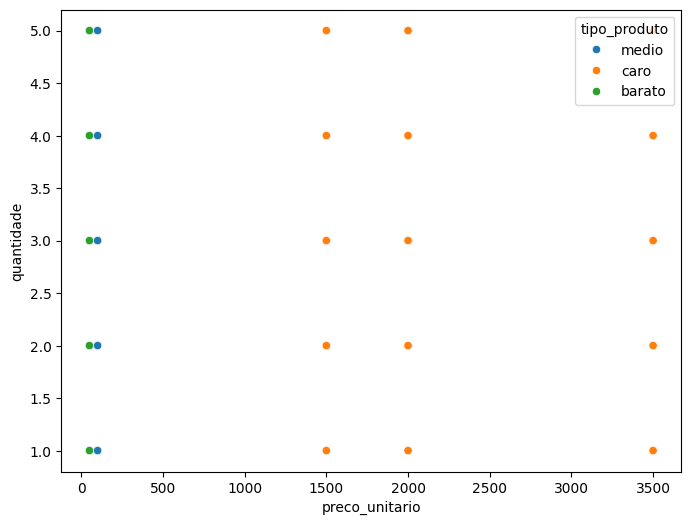

In [56]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_vendas, x = 'preco_unitario', y = 'quantidade',hue='tipo_produto')
plt.show()

In [57]:
df_vendas['quantidade'].unique()

array([4, 2, 3, 5, 1])

**Como a quantidade vendida varia entre diferentes categorias de produtos?**

In [58]:
quantidade_vendida_por_categoria = df_vendas.groupby('categoria')['quantidade'].mean().reset_index().sort_values(by='quantidade', ascending=False)

In [59]:
quantidade_vendida_por_categoria

,categoria,quantidade
0,Acessórios,3.036640
1,Eletrônicos,2.949733


In [60]:
quantidade_vendida_por_tipo = df_vendas.groupby('tipo_produto')['quantidade'].mean().reset_index().sort_values(by='quantidade', ascending=False)

In [61]:
quantidade_vendida_por_tipo

,tipo_produto,quantidade
2,medio,3.053447
0,barato,3.019900
1,caro,2.949733


## 4. Evolução das Vendas:

**Como as vendas evoluíram ao longo do ano?**

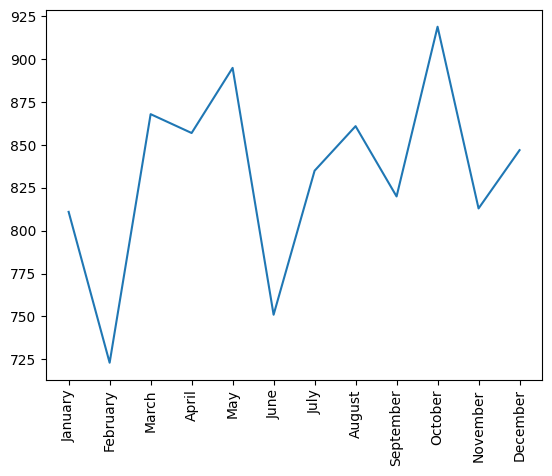

In [62]:
plt.plot(df_vendas_por_mes['Mês'],df_vendas_por_mes['Venda'])
plt.xticks(rotation=90)
plt.show()

In [63]:
df_vendas_por_mes_total = df_vendas.groupby(['Mês','Mês_num'])['total_venda'].sum().reset_index().sort_values(by='Mês_num')

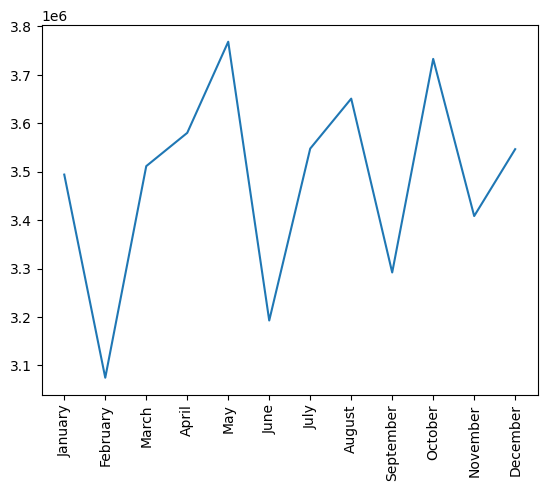

In [64]:
plt.plot(df_vendas_por_mes_total['Mês'],df_vendas_por_mes_total['total_venda'])
plt.xticks(rotation=90)
plt.show()

Houve crescimento ou declínio significativo em certos meses?

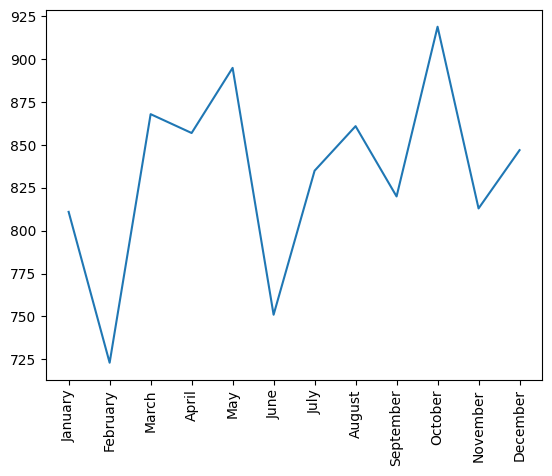

In [65]:
plt.plot(df_vendas_por_mes['Mês'],df_vendas_por_mes['Venda'])
plt.xticks(rotation=90)
plt.show()

## Hands-On

**Agora é com você.**

Utilize a base de dados que trabalhamos na aula para criar um relatório visual em python que inclua:
- Gráficos que mostram a distribuição de vendas por tipo de produto (preço): quantidade de vendas e total_venda.
- Lineplots que mostram a evolução das vendas ao longo dos meses por tipo de produto.
- Conclua com *insights* e recomendações baseadas nos dados analisados.

##Gráficos que mostram a distribuição de vendas por tipo de produto (preço): quantidade de vendas e total_venda.

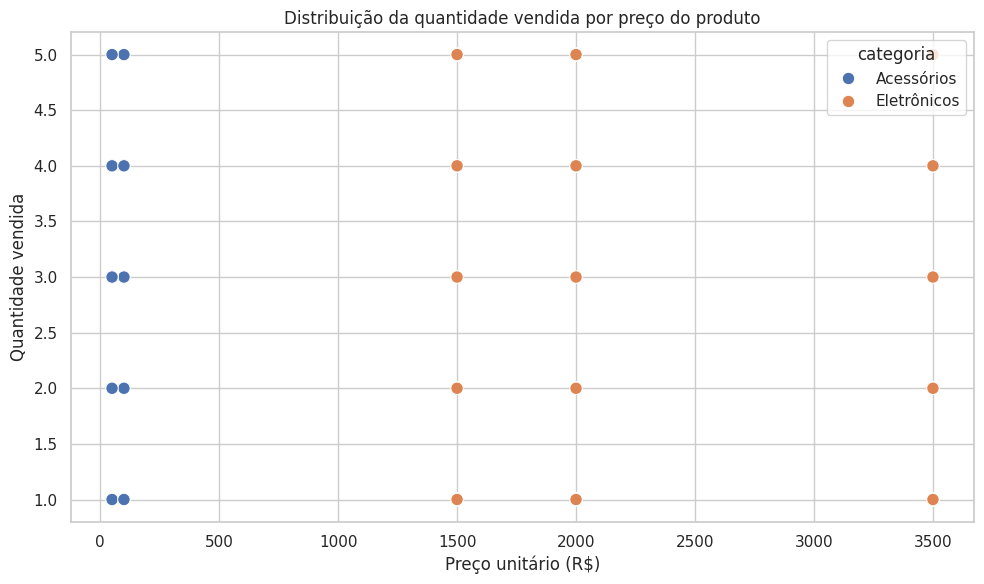

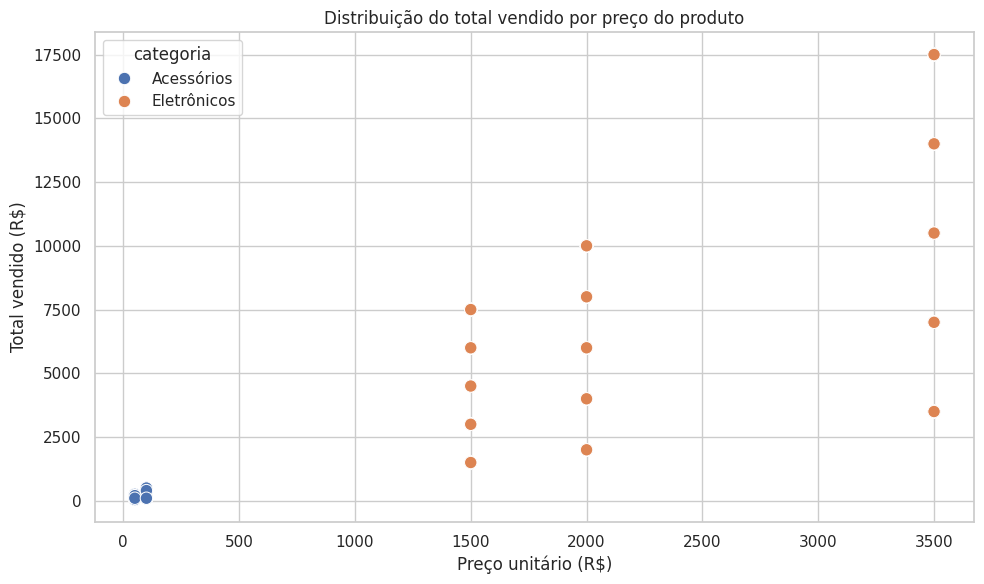

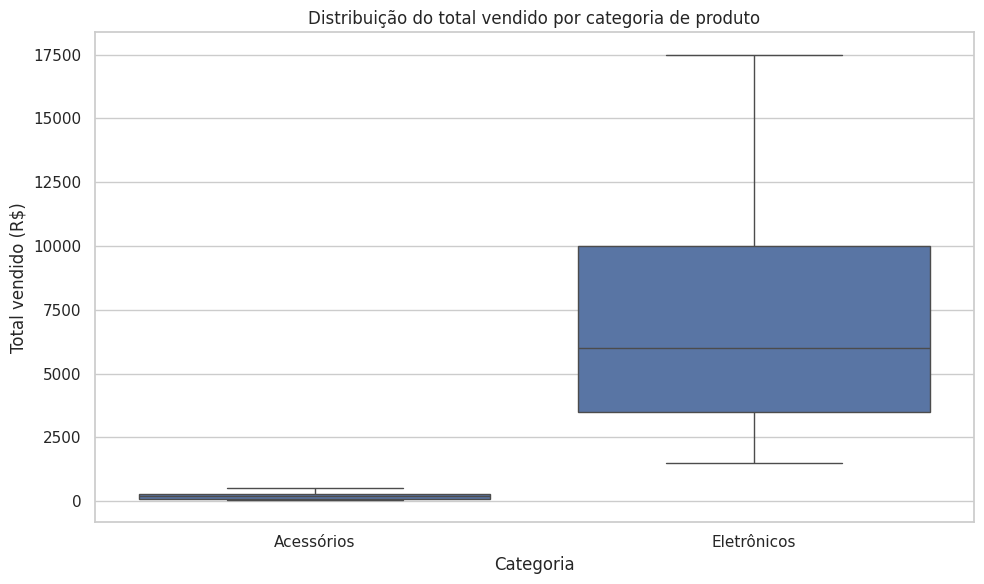

In [68]:
sns.set(style="whitegrid")

# -------------------------------
# Distribuição da quantidade vendida por preço
# Ajuda a ver se produtos mais caros vendem mais ou menos unidades.
# -------------------------------
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_vendas, x="preco_unitario", y="quantidade", hue="categoria", s=80)
plt.title("Distribuição da quantidade vendida por preço do produto")
plt.xlabel("Preço unitário (R$)")
plt.ylabel("Quantidade vendida")
plt.tight_layout()
plt.show()

# -------------------------------
# Distribuição do total vendido por preço
# Mostra quais produtos geram maior faturamento.
# -------------------------------
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_vendas, x="preco_unitario", y="total_venda", hue="categoria", s=80)
plt.title("Distribuição do total vendido por preço do produto")
plt.xlabel("Preço unitário (R$)")
plt.ylabel("Total vendido (R$)")
plt.tight_layout()
plt.show()

# -------------------------------
# Boxplots
# Mostra a variação do total vendido dentro de cada categoria — útil para entender quais categorias têm mais estabilidade ou picos de venda.
# -------------------------------

plt.figure(figsize=(10,6))
sns.boxplot(data=df_vendas, x="categoria", y="total_venda")
plt.title("Distribuição do total vendido por categoria de produto")
plt.xlabel("Categoria")
plt.ylabel("Total vendido (R$)")
plt.tight_layout()
plt.show()

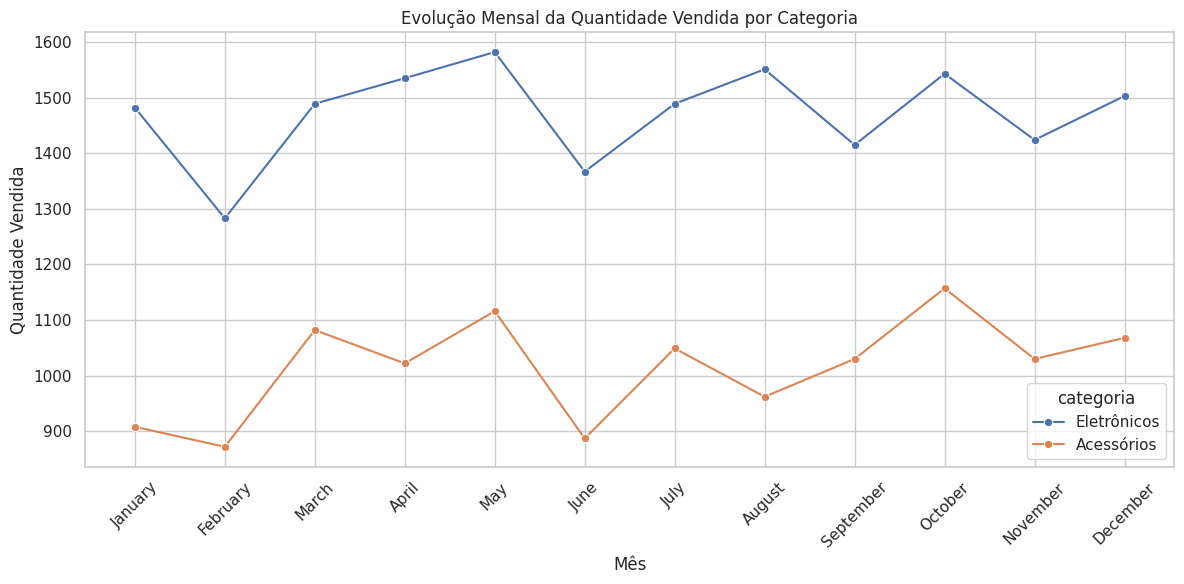

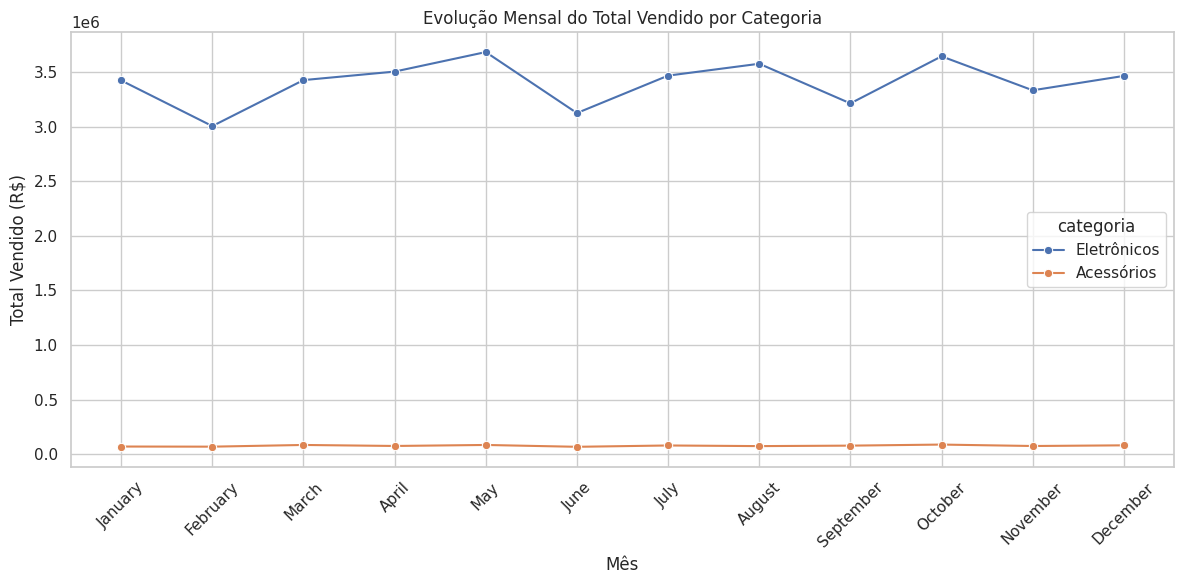

In [74]:
sns.set(style="whitegrid")

# -------------------------------
# Lineplot da evolução da QUANTIDADE vendida por mês e categoria
# -------------------------------
df_quantidade_por_mes_categoria = df_vendas.groupby(['Mês', 'Mês_num', 'categoria'])['quantidade'].sum().reset_index()
df_quantidade_por_mes_categoria = df_quantidade_por_mes_categoria.sort_values(by='Mês_num')

plt.figure(figsize=(12,6))
sns.lineplot(data=df_quantidade_por_mes_categoria, x="Mês", y="quantidade", hue="categoria", marker="o")
plt.title("Evolução Mensal da Quantidade Vendida por Categoria")
plt.xlabel("Mês")
plt.ylabel("Quantidade Vendida")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# -------------------------------
# Lineplot da evolução do TOTAL vendido por mês e categoria
# -------------------------------

df_total_venda_por_mes_categoria = df_vendas.groupby(['Mês', 'Mês_num', 'categoria'])['total_venda'].sum().reset_index()
df_total_venda_por_mes_categoria = df_total_venda_por_mes_categoria.sort_values(by='Mês_num')

plt.figure(figsize=(12,6))
sns.lineplot(data=df_total_venda_por_mes_categoria, x="Mês", y="total_venda", hue="categoria", marker="o")
plt.title("Evolução Mensal do Total Vendido por Categoria")
plt.xlabel("Mês")
plt.ylabel("Total Vendido (R$)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Insights

**1. Produtos eletrônicos geram a maior parte do faturamento**

Mesmo apresentando preços mais altos e quantidades menores, os produtos eletrônicos concentram a maior parte do total_venda. Isso indica forte dependência da empresa desse tipo de produto.


**2. Acessórios têm maior variação de quantidade vendida**

Os gráficos mostram que produtos mais baratos (ex.: cabos, adaptadores, periféricos) vendem em maior volume, mas são inconsistentes mês a mês. A demanda é mais volátil e sensível a promoções e estoque.

**3. Não há aumento significativo mês a mês (baixa sazonalidade)**

Os lineplots mostram curvas relativamente estáveis ao longo dos meses, tanto em quantidade quanto em faturamento. As vendas não apresentam picos fortes sazonais.

**4. A relação preço × total_venda é clara**

Preços altos = menor quantidade, mas alto faturamento

Preços baixos = maior quantidade, menor faturamento

A empresa precisa equilibrar estratégias entre volume e margem.